In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
data = pd.read_csv('data_limpieza.csv')
data.shape

(8465, 13)

In [3]:
data.head()
headers = data.columns.tolist()
headers

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday']

- **Date**: fecha de la observación
- **Hour**: hora de la observación (0-23)
- **Temperature(C)**: temperatura en grados Celsius
- **Humidity(%)**: humedad relativa
- **Wind speed (m/s)**: velocidad del viento en metros por segundo
- **Visibility (10m)**: visibilidad con una escala de 10 metros
- **Dew point temperature(C)**: temperatura de punto de rocío en grados Celsius
- **Solar Radiation (MJ/m2)**: radiación solar en MegaJoules por metro cuadrado
- **Rainfall(mm)**: nivel de lluvia en milímetros
- **Snowfall (cm)**: nieve en centímetros
- **Seasons**: estación del año
- **Holiday**: si es un día festivo

Variable de respuesta:
- **Rented Bike Count**: ventas del producto publicitado en miles de unidades

### Estadísticas descriptivas

In [32]:
# Realizo una copia del DataFrame original
data_encoded = data.copy()

# Codificar las columnas categóricas en la copia
data_encoded['Seasons'] = data_encoded['Seasons'].astype('category').cat.codes
data_encoded['Holiday'] = data_encoded['Holiday'].astype('category').cat.codes


In [33]:
data_encoded.describe()

Rented Bike Count         Hour  Temperature(C)  Humidity(%)  \
count        8465.000000  8465.000000     8465.000000  8465.000000   
mean          729.156999    11.507029       12.771057    58.147194   
std           642.351166     6.920899       12.104375    20.484839   
min             2.000000     0.000000      -17.800000     0.000000   
25%           214.000000     6.000000        3.000000    42.000000   
50%           542.000000    12.000000       13.500000    57.000000   
75%          1084.000000    18.000000       22.700000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
count       8465.000000       8465.000000               8465.000000   
mean           1.725883       1433.873479                  3.944997   
std            1.034281        609.051229                 13.242399   
min            0.000000         27.000000                -30.600000   
25%            0.900000        935.000000                 -5.100000   
50%            1.500000       1690.000000                  4.700000   
75%            2.300000       2000.000000                 15.200000   
max            7.400000       2000.000000                 27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)      Seasons  \
count              8465.000000    8465.00000    8465.000000  8465.000000   
mean                  0.567868       0.14912       0.077685     1.542351   
std                   0.868245       1.12554       0.444063     1.102876   
min                   0.000000       0.00000       0.000000     0.000000   
25%                   0.000000       0.00000       0.000000     1.000000   
50%                   0.010000       0.00000       0.000000     2.000000   
75%                   0.930000       0.00000       0.000000     3.000000   
max                   3.520000      35.00000       8.800000     3.000000   

           Holiday  
count  8465.000000  
mean      0.951802  
std       0.214198  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

### Incluir seaborn para Visualización

In [34]:
import seaborn as sns

In [35]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

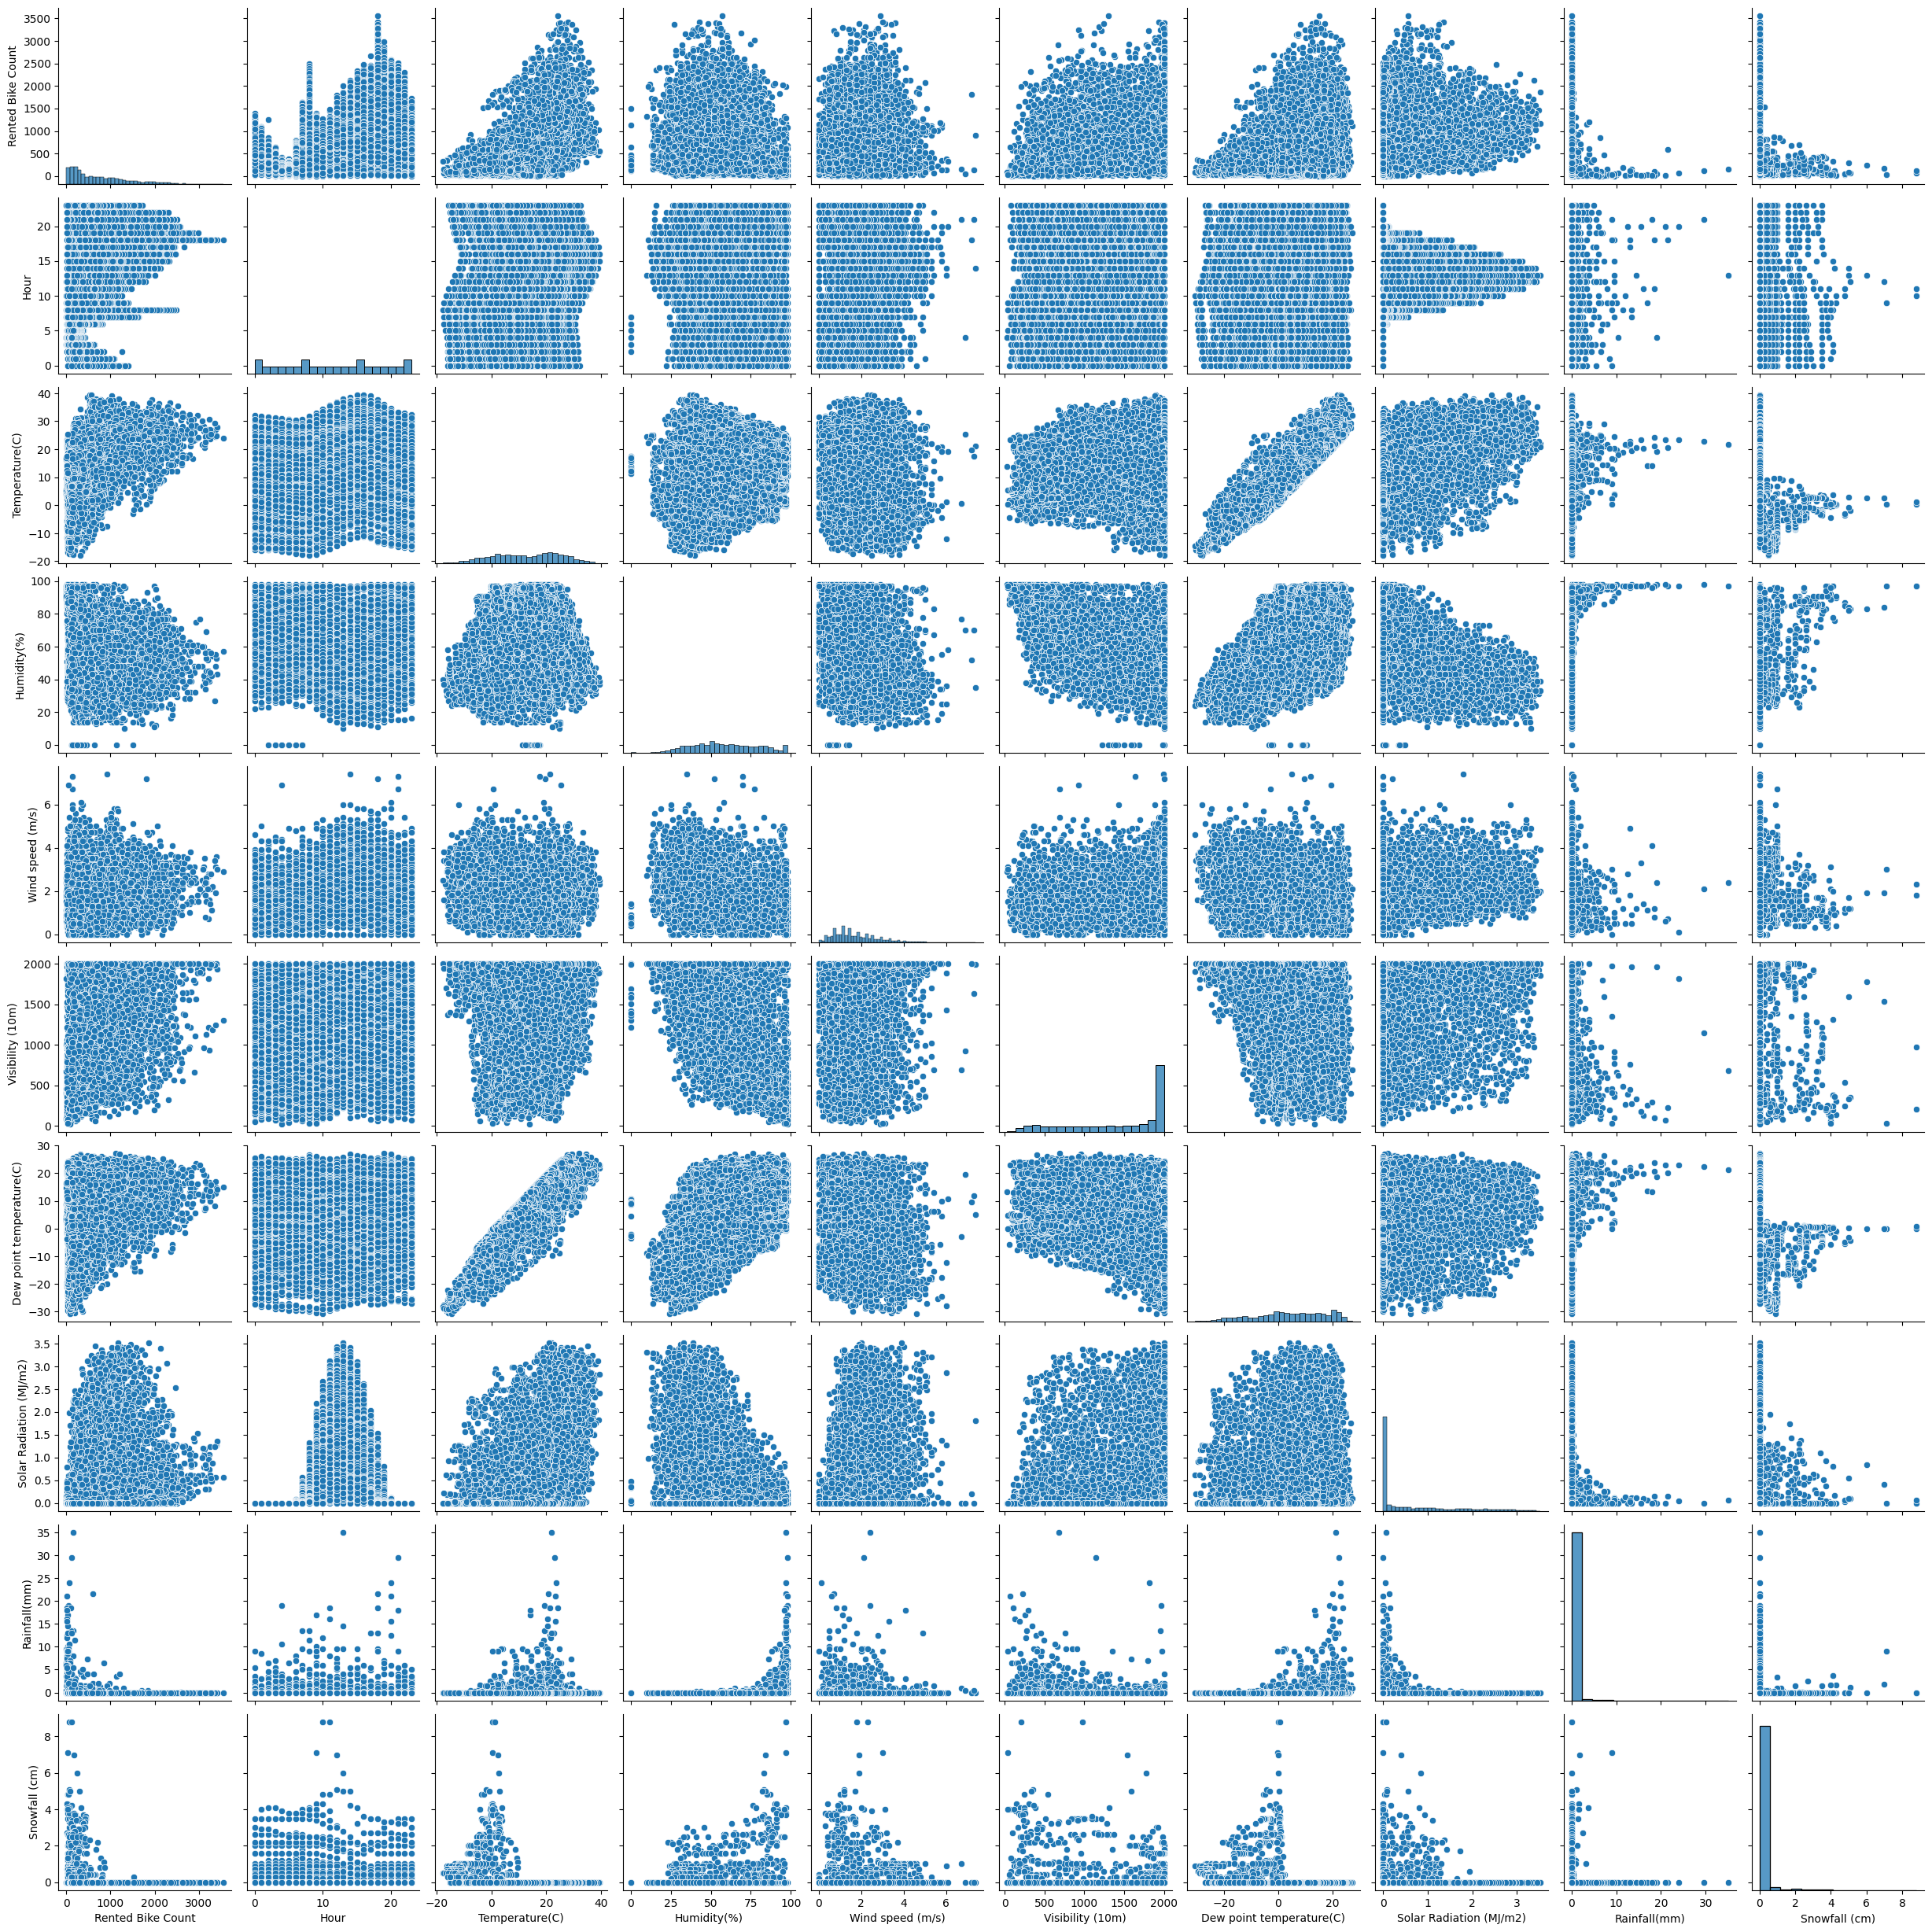

In [37]:
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

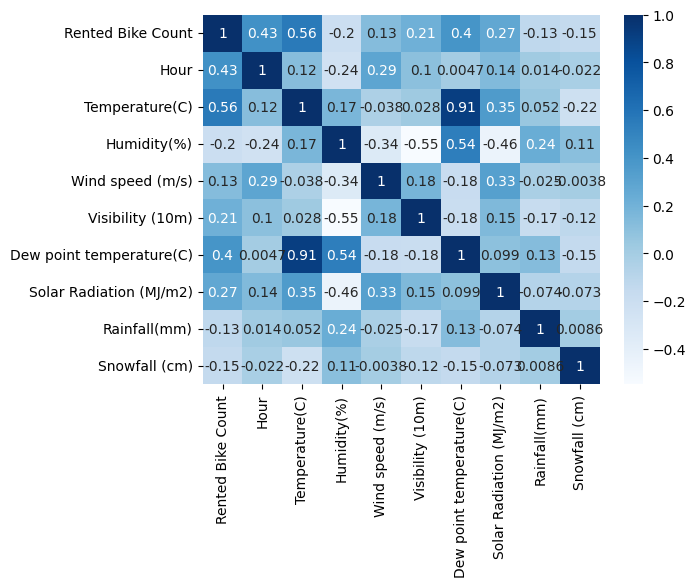

In [38]:
# Excluir columnas no numéricas
numeric_data = data.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr = numeric_data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

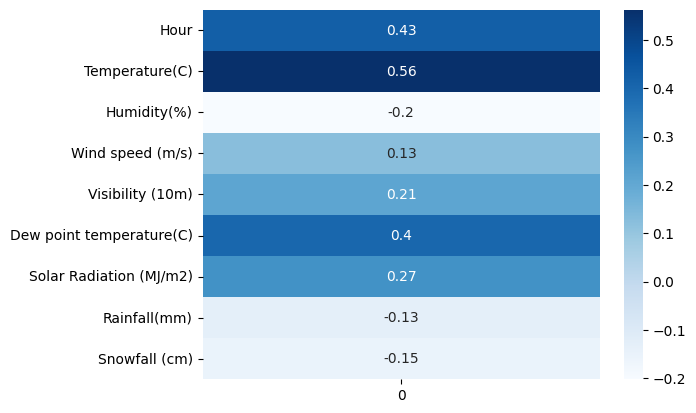

In [39]:
corrw = numeric_data.drop(['Rented Bike Count'], axis=1).corrwith(data['Rented Bike Count'])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

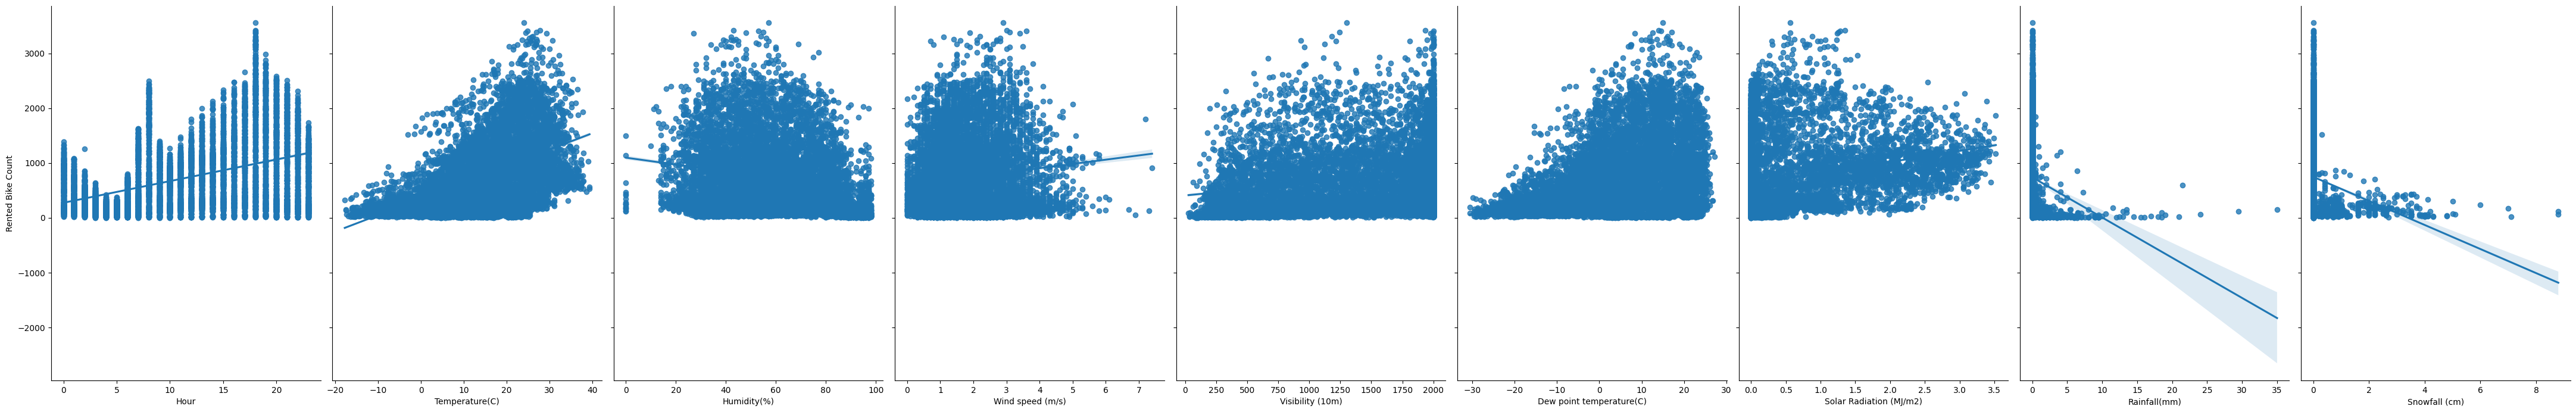

In [40]:


sns.pairplot(numeric_data, x_vars=[
'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)'], y_vars='Rented Bike Count', height=7, aspect=0.7, kind='reg')

### Modelo de regresión

$y = \beta_0 + \beta_1 \times \text{Hour} + \beta_2 \times \text{Temperature} + \beta_3 \times \text{Humidity} + \beta_4 \times \text{Wind speed} + \beta_5 \times \text{Visibility} + \beta_6 \times \text{Dew point temperature} + \beta_7 \times \text{Solar Radiation} + \beta_8 \times \text{Rainfall} + \beta_9 \times \text{Snowfall} + \alpha_1 \times \text{Seasons} + \alpha_2 \times \text{Holiday}$

Variables Explicativas

In [6]:
# nombres de características
features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)','Seasons','Holiday']

X = data[features]
X = pd.get_dummies(X, columns=['Seasons','Holiday'], dtype=int, drop_first=True)

X.head()

Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0            -5.2           37               2.2              2000   
1     1            -5.5           38               0.8              2000   
2     2            -6.0           39               1.0              2000   
3     3            -6.2           40               0.9              2000   
4     4            -6.0           36               2.3              2000   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   

   Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            0.0               0               0               1   
1            0.0               0               0               1   
2            0.0               0               0               1   
3            0.0               0               0               1   
4            0.0               0               0               1   

   Holiday_No Holiday  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [7]:
X.shape

(8465, 13)

Variable de respuesta

In [8]:
# variable de respuesta
y = data['Rented Bike Count']

y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

Tipo de datos por variables

In [9]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# tamaños
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6348, 13)
(6348,)
(2117, 13)
(2117,)


In [12]:
print(X.head())
print(X_train.head())

   Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0            -5.2           37               2.2              2000   
1     1            -5.5           38               0.8              2000   
2     2            -6.0           39               1.0              2000   
3     3            -6.2           40               0.9              2000   
4     4            -6.0           36               2.3              2000   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   

   Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            0.0               0               0      

In [13]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [14]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6772, 13)
(6772,)
(1693, 13)
(1693,)


In [15]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [17]:
print(X.head())
print(X_train.head())

   Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0            -5.2           37               2.2              2000   
1     1            -5.5           38               0.8              2000   
2     2            -6.0           39               1.0              2000   
3     3            -6.2           40               0.9              2000   
4     4            -6.0           36               2.3              2000   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   

   Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            0.0               0               0      

In [18]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6348, 13)
(6348,)
(2117, 13)
(2117,)


In [19]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [21]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

991.0764448060727
[ 2.79280964e+01  1.15553341e+01 -1.26849994e+01  1.66781279e+01
  7.55953607e-03  1.69019619e+01 -7.94466835e+01 -6.59869286e+01
  4.10718981e+01 -1.39015882e+02 -1.66700140e+02 -3.62413756e+02
  1.29915111e+02]


In [22]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('Hour', np.float64(27.92809639685666)),
 ('Temperature(C)', np.float64(11.555334145110615)),
 ('Humidity(%)', np.float64(-12.684999422786598)),
 ('Wind speed (m/s)', np.float64(16.678127918682094)),
 ('Visibility (10m)', np.float64(0.007559536068577288)),
 ('Dew point temperature(C)', np.float64(16.90196194235467)),
 ('Solar Radiation (MJ/m2)', np.float64(-79.44668349471311)),
 ('Rainfall(mm)', np.float64(-65.98692857490646)),
 ('Snowfall (cm)', np.float64(41.071898146150744)),
 ('Seasons', np.float64(-139.01588234788062)),
 ('Holiday', np.float64(-166.7001401391842))]

### Predicciones usando los datos de prueba

In [23]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [24]:
from sklearn import metrics

In [25]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [28]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  329.5100919317812
MSE:  195235.57639607968
RMSE:  441.85470054767967


### Selección de variables - Modelo con otro subconjunto de variables

In [27]:
featuresb = ['TV', 'Radio']

X = data[featuresb]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

KeyError: "None of [Index(['TV', 'Radio'], dtype='object')] are in the [columns]"

### Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

In [ ]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

In [ ]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

## Ahora usando statsmodels

In [ ]:
import statsmodels.api as sm

features = ['TV', 'Radio', 'Newspaper']

X = data[features]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

### El segundo modelo, sin Newspaper

In [ ]:
featuresb = ['TV', 'Radio']

X = data[featuresb]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

### Determinar la influencia de las observaciones

In [ ]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [ ]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

In [ ]:
X_train[out_d]

In [ ]:
y_train[out_d]